In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(fileURL, names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species'], header = None)
iris = iris.dropna()

In [3]:
%pylab inline

# (c) 2014 Reid Johnson and Everaldo Aguiar
#
# Functions to work with continuous data and linear regression models.

import matplotlib.pyplot as pl

def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                for name in data[classes]:
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
                #t = plt.title(name)
            i += 1

    pl.show()

Populating the interactive namespace from numpy and matplotlib


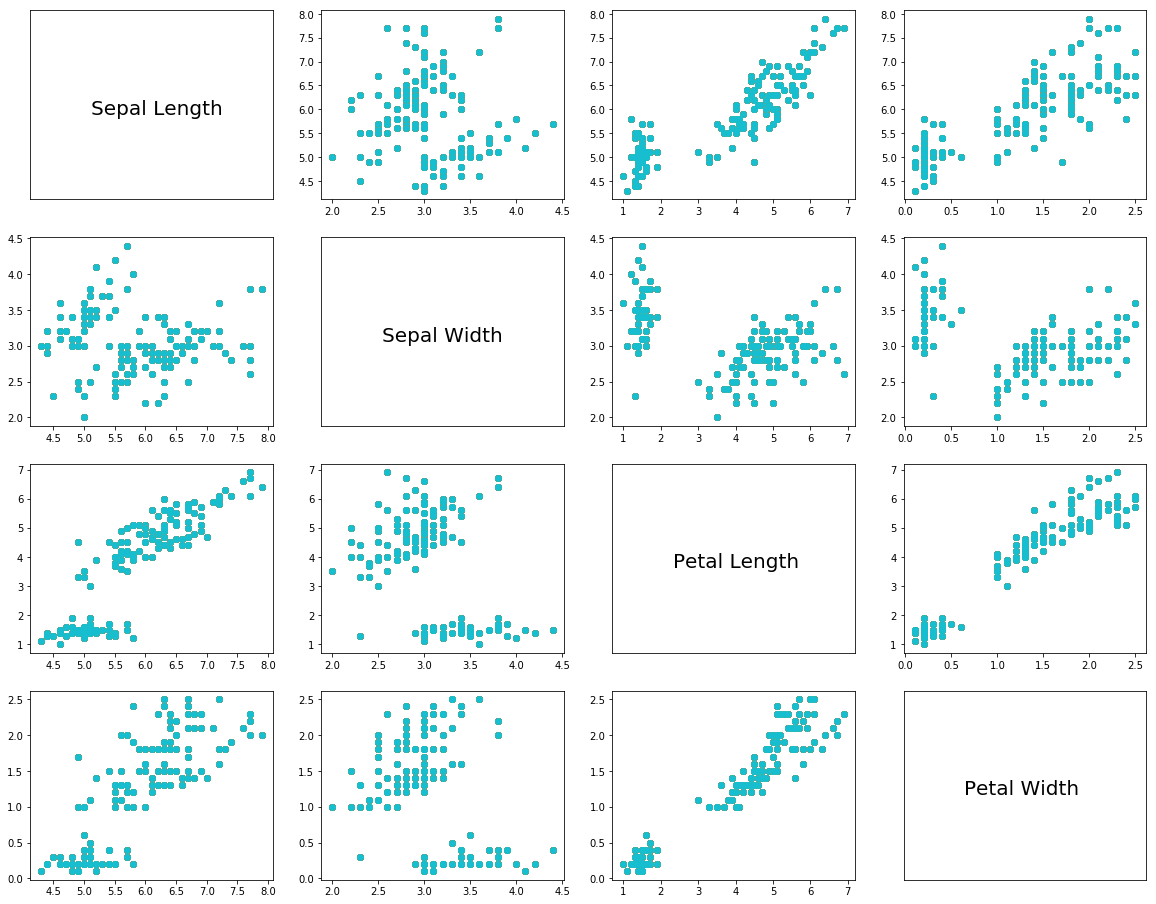

In [4]:
pairs(iris)

In [16]:
from sklearn.cross_validation import train_test_split

def Linear_regression_calc(x, y):
    first_feature = iris[[x]]
    second_feature = iris[[y]]
    
    x_train, x_test, y_train, y_test = train_test_split(first_feature, second_feature)
    
    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)

    y_pred = regr.predict(x_test)
    
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, y_pred))

    # Plot outputs
    plt.scatter(x_test, y_test,  color='black')
    plt.plot(x_test, y_pred, color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()


Coefficients: 
 [[1.79701681]]
Mean squared error: 0.67
Variance score: 0.80


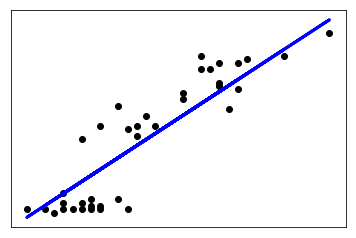

In [17]:
Linear_regression_calc('Sepal Length', 'Petal Length')

Coefficients: 
 [[0.43067354]]
Mean squared error: 0.21
Variance score: 0.62


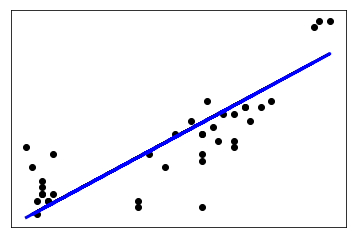

In [18]:
Linear_regression_calc('Petal Length', 'Sepal Length')

Coefficients: 
 [[-0.08146131]]
Mean squared error: 0.13
Variance score: -0.10


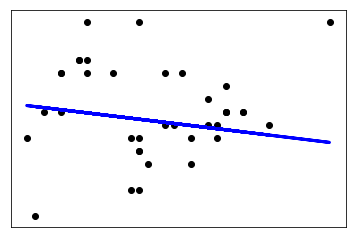

In [19]:
Linear_regression_calc('Sepal Length', 'Sepal Width')

Coefficients: 
 [[-0.34764162]]
Mean squared error: 0.74
Variance score: -0.07


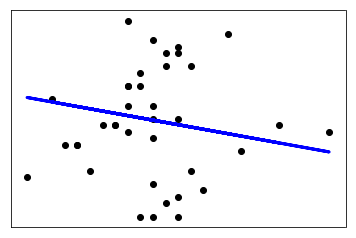

In [20]:
Linear_regression_calc('Sepal Width', 'Sepal Length')

Coefficients: 
 [[0.77061413]]
Mean squared error: 0.22
Variance score: 0.58


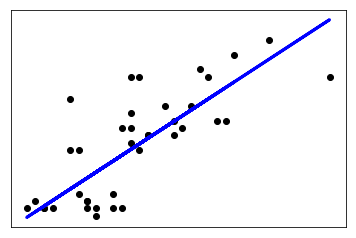

In [30]:
Linear_regression_calc('Sepal Length', 'Petal Width')

Coefficients: 
 [[0.83669906]]
Mean squared error: 0.35
Variance score: 0.59


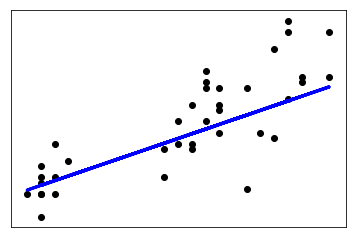

In [31]:
Linear_regression_calc('Petal Width', 'Sepal Length')

Coefficients: 
 [[-1.61420726]]
Mean squared error: 2.48
Variance score: 0.13


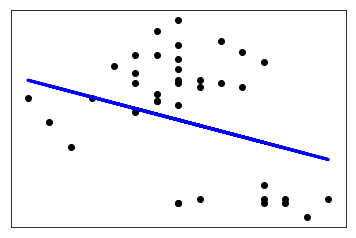

In [23]:
Linear_regression_calc('Sepal Width', 'Petal Length')

Coefficients: 
 [[-0.09687633]]
Mean squared error: 0.19
Variance score: 0.15


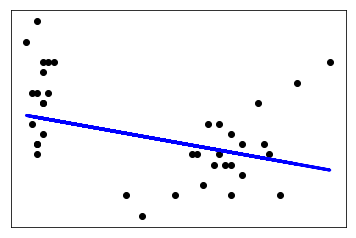

In [24]:
Linear_regression_calc('Petal Length', 'Sepal Width')

Coefficients: 
 [[-0.65433424]]
Mean squared error: 0.52
Variance score: -0.11


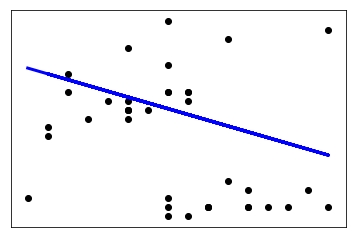

In [25]:
Linear_regression_calc('Sepal Width', 'Petal Width')

Coefficients: 
 [[-0.23066296]]
Mean squared error: 0.23
Variance score: -0.07


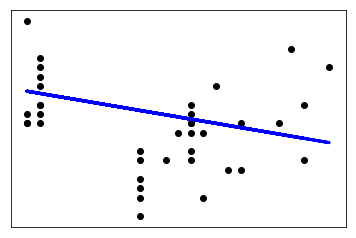

In [26]:
Linear_regression_calc('Petal Width', 'Sepal Width')

# The Best of Linear Regression model Generated: 

Coefficients: 
 [[0.41619269]]
Mean squared error: 0.04
Variance score: 0.91


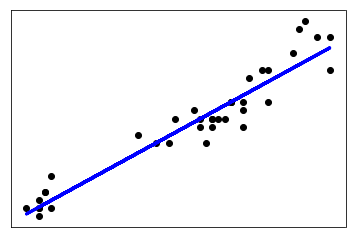

In [27]:
Linear_regression_calc('Petal Length', 'Petal Width')

Coefficients: 
 [[2.23612391]]
Mean squared error: 0.21
Variance score: 0.93


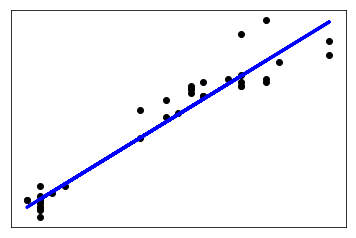

In [28]:
Linear_regression_calc('Petal Width', 'Petal Length')